# Module 12 Challenge (11 Challenge???)
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)
# Optional delay for loading the page
browser.is_element_present_by_css('div.list_text', wait_time=1)

False

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Parse the website
html = browser.html

In [5]:
# Create a Beautiful Soup Object
html_soup = soup(html, 'html.parser')
#print(html_soup)

In [6]:
# Extract all rows of data
# Think soup has already completed task

In [7]:
# Testing...     works
#print(html_soup.head)

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [8]:
# Create an empty list

# Loop through the scraped data to create a list of rows


In [9]:
# Find the table
table = html_soup.find('table', class_='table')

In [10]:
# Testing the table     works
#table

In [11]:
# Store the table
mars_facts = {}
rows = table.find_all('tr')

# Loop through the rows
for row in rows:
    row_heading = row.find('tr', 'th')
    row_data = row.find('tr', class_="data-row")
    mars_facts[row_heading] = row_data
    

In [12]:
# Testing     #rows works but no data passed to list?
#rows
mars_facts

{None: None}

In [13]:
# Above didn't work...     # https://stackoverflow.com/questions/41689944/beautifulsoup-to-parse-an-html-table
# Below works, for data in table only. No column headers (row 1), appears empty?
table_body = table.find('tbody')
rows = table_body.find_all('tr')
data = []
for row in rows:
    cols = []
    for col in row.find_all('td'):
        t = col.text.strip()
        cols.append(t)
    data.append(cols)
#print(data)

In [14]:
# Printing data but row1 is empty, due to no <th>?
data

[[],
 ['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-7

In [15]:
# Create a Pandas DataFrame by using the list of rows and a 
# list of the column names
#df = pd.DataFrame ([table_data],
                   #index=['id'], 
                   #columns = ['id',
                              #'terrestrial_date',
                              #'sol',
                              #'ls',
                              #'month',
                              #'min_temp',
                              #'pressure'])


In [16]:
# Read HTML table(s) into a DataFrame
# Unapproved work-around as the list method above is not working. Moving on...
df = pd.read_html('https://static.bc-edx.com/data/web/mars_facts/temperature.html')

In [17]:
# Looking at first, and only table on webpage.
mars_df = df[0]


In [18]:
# Confirm DataFrame was created successfully
mars_df.head(3)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [19]:
# Examine data type of each column
mars_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [20]:
# Change data types for data analysis
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])

In [21]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [22]:
# 1. How many months are there on Mars?

month_count = mars_df.groupby("month")["month"].unique()
print((f"Months in a Martian Year: "), month_count)

Months in a Martian Year:  month
1      [1]
2      [2]
3      [3]
4      [4]
5      [5]
6      [6]
7      [7]
8      [8]
9      [9]
10    [10]
11    [11]
12    [12]
Name: month, dtype: object


In [23]:
print(f"Months in a Martian Year: ", (max(month_count)))

Months in a Martian Year:  [12]


In [24]:
# 2. How many Martian days' worth of data are there?
# First recorded martian day in table
print(mars_df.iloc[0]['sol'])

10


In [25]:
# Last recorded martian day in table
print(mars_df.iloc[-1]['sol'])

1977


In [26]:
# Assign variables to do calculation
start_sol = (mars_df.iloc[0]['sol'])

In [27]:
end_sol = (mars_df.iloc[-1]['sol'])

In [28]:
# The Mars Data (bottom of page) states data for 1894 Sols,
# from 2012-08-07 to 2018-02-27? Not 1967 Sols.
total_sol = end_sol - start_sol
print(f"Total Sol data days: ", total_sol)

Total Sol data days:  1967


In [29]:
# 3. What is the average low temperature by month? Units? °F,°C,°K?
ave_low = mars_df.groupby(["month"]).mean()["min_temp"].round(1)
print(f"Average low temperature by month (year over year): ", ave_low)

Average low temperature by month (year over year):  month
1    -77.2
2    -79.9
3    -83.3
4    -82.7
5    -79.3
6    -75.3
7    -72.3
8    -68.4
9    -69.2
10   -72.0
11   -72.0
12   -74.5
Name: min_temp, dtype: float64


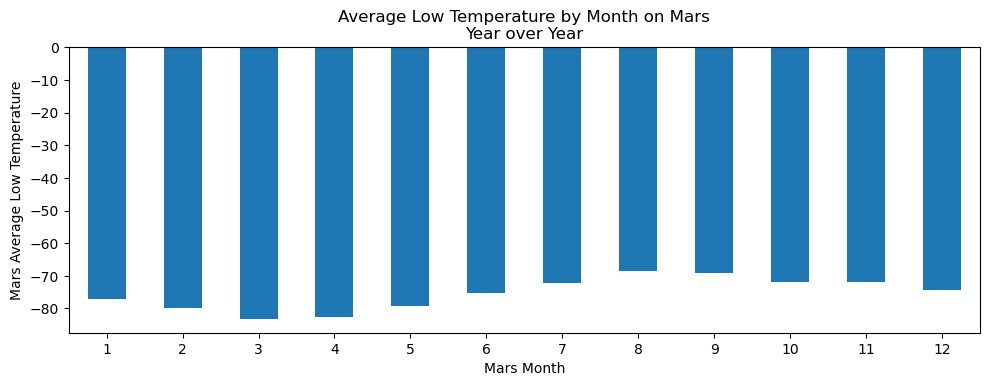

In [30]:
# Plot the average temperature by month
ave_low.plot(kind="bar", figsize=(10,4))
plt.title("Average Low Temperature by Month on Mars\nYear over Year")
plt.xlabel("Mars Month")
plt.ylabel("Mars Average Low Temperature")
plt.tight_layout()
plt.xticks(rotation=0)
plt.savefig('ave_low.png')
plt.show()

In [31]:
# Identify the coldest and hottest months in Curiosity's location
# Try summary statistics on the DataFrame
ave_low.describe()

count    12.000000
mean    -75.508333
std       5.002265
min     -83.300000
25%     -79.450000
50%     -74.900000
75%     -72.000000
max     -68.400000
Name: min_temp, dtype: float64

In [32]:
# VISUAL INSPECTION OF PLOT
# Looking at the plot, month 3 is the coldest, while month 8 is the warmest.
# Using the average temperatures per month from above, not daily temps.

# Coldest month by calculation method
cold_month = mars_df.groupby(["month"]).mean()["min_temp"].idxmin()
cold_month_val = min(ave_low)

print(f"Coldest month is:", cold_month, "at", cold_month_val)
#  try idxmin() per Chris per Daniella?

Coldest month is: 3 at -83.3


In [33]:
# Warmest month by calculation method
warm_month = mars_df.groupby(["month"]).mean()["min_temp"].idxmax()
warm_month_val = max(ave_low)

print(f"Warmest month is:", warm_month, "at", warm_month_val)

Warmest month is: 8 at -68.4


In [34]:
# 4. Average pressure by Martian month
ave_atm = mars_df.groupby(["month"]).mean()["pressure"].round(1)
print(f"Average atmospheric pressure by month (year over year): ", ave_atm)

Average atmospheric pressure by month (year over year):  month
1     862.5
2     889.5
3     877.3
4     806.3
5     748.6
6     745.1
7     795.1
8     873.8
9     913.3
10    887.3
11    857.0
12    842.2
Name: pressure, dtype: float64


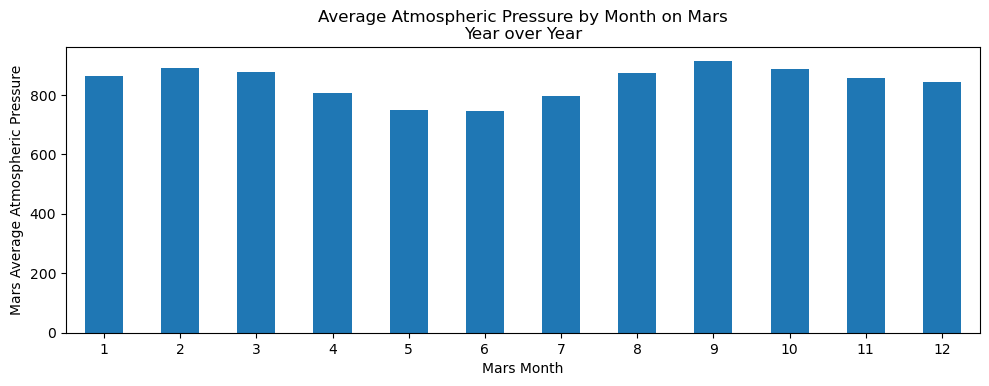

In [36]:
# Plot the average pressure by month
ave_atm.plot(kind="bar", figsize=(10,4))
plt.title("Average Atmospheric Pressure by Month on Mars\nYear over Year")
plt.xlabel("Mars Month")
plt.ylabel("Mars Average Atmospheric Pressure")
plt.tight_layout()
plt.xticks(rotation=0)
plt.savefig('ave_atm.png')
plt.show()

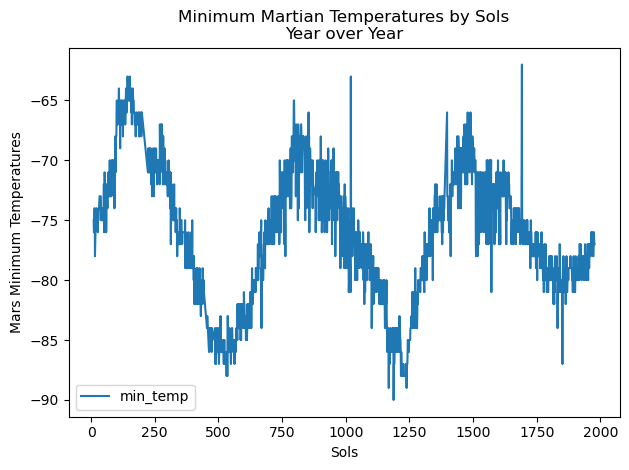

In [38]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# Go season to season, eg. summer highs to summer highs.
mars_df.plot.line("sol", "min_temp")
plt.title("Minimum Martian Temperatures by Sols\nYear over Year")
plt.xlabel("Sols")
plt.ylabel("Mars Minimum Temperatures")
plt.tight_layout()
plt.xticks(rotation=0)
plt.savefig('mars_days.png')
plt.show()

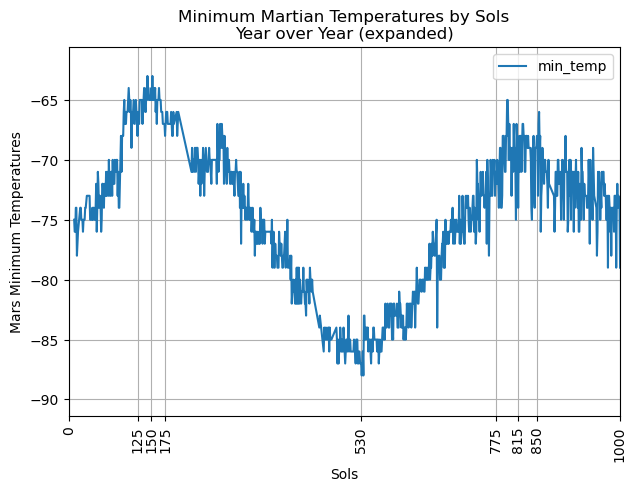

In [39]:
# 5 continued. How many terrestrial (earth) days are there in a Martian year?
mars_df.plot.line("sol", "min_temp")
plt.title("Minimum Martian Temperatures by Sols\nYear over Year (expanded)")
plt.xlabel("Sols")
plt.ylabel("Mars Minimum Temperatures")
plt.tight_layout()
plt.xlim(0,1000)
plt.grid()
plt.xticks([0,125,150,175,530,775,815,850,1000],rotation=90)
plt.show()

In [40]:
# Just reviewing the dataframe from above.
mars_df.head(3)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0


In [41]:
earth_days_start = mars_df["terrestrial_date"].min()
eds = earth_days_start
eds

Timestamp('2012-08-16 00:00:00')

In [42]:
earth_days_end = mars_df["terrestrial_date"].max()
ede = earth_days_end
ede

Timestamp('2018-02-27 00:00:00')

In [43]:
# Difference to determine number of Earth calendar days
earth_day = (ede - eds)
print(f"How long weather data was recorded in Earth time:",earth_day)

How long weather data was recorded in Earth time: 2021 days 00:00:00


In [44]:
# Can't work with delta time days. Convert to float value.
earth_days = float(earth_day.days)
print(earth_days)

2021.0


In [45]:
# A Martian sol equals approximately how may Earth days? Ratio sol/day.
print(f"A Martian Sol (day) is approximately",(total_sol/earth_days),"Earth days.")

A Martian Sol (day) is approximately 0.9732805541810985 Earth days.


Seems Mars has ~12 months in a Martian year. Determined by grouping months and Sols (Martian days).

There appears to be 1967 Sols of data reported, subtracting the starting Sol from the ending Sol. However, the data information at the bottom of the table states 1894 Sols (August 7, 2012 to February 27, 2018). Appears to be a data conflict.

Visual inspection of the plot, "Average Low Temperature by Month on Mars, Year over Year", has the third (3) month as having the coldest average temperature.

The eighth (8) month of Mars is the warmest by plot visual inspection.

The found min/max values confirm the visual inspections.
*****************************************************************************

The plot, "Average Atmospheric Pressure by Month on Mars, Year over Year", shows the second (2) month has the lowest pressure while the ninth (9) month has the highest atmospheric pressure. Month 2 and month 3 are pretty close in values.

The lowest average temperature month is pretty close to the lowest atmospheric pressure month, while the highest average temperature matches up with the maximum average atmospheric pressure.

Seems to match the Ideal Gas Law: P*V = n*R*T. Increase in temperature corresponds to an increase in pressure.
*****************************************************************************

Examining the plot, "Minimum Martian Temperatures by Sols, Year over Year (expanded)", the expanded detail show peak-to-peak maximums at ~150 and ~815 Sols. The Martian Year is ~ 665 Sols (going from 'summer to summer').

A Google internet search reveals a Martian Year as 687 Earth days. My visual determination of the Martian year is short by 22 Earth days.

Additionally, comparing Earth calendar dates to Martian Sols by ratio (over same time delta) shows an Earth day is ~0.973 Martian Sols. Vice-versa the ratio would be 1.028 to go the other direction.
*******************************************************************************

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [46]:
# Write the data to a CSV
mars_df.to_csv(r'Mars_CSV.csv', index=False)

In [ ]:
browser.quit()